Kaggle contest dataset https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('../../datasets/heart-disease.csv')

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Kaggle Heart Disease Competition

In [17]:
heart_disease_df = pd.read_csv('../../datasets/heart-disease.csv')

In [18]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease_df.drop(['target'], axis=1)
y = heart_disease_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Baseline Prediction

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6973684210526315

## Prediction With Standardization 

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
accuracy_with_scaling

0.8947368421052632

# Model Improvement

In [28]:
df = X

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<Axes: >

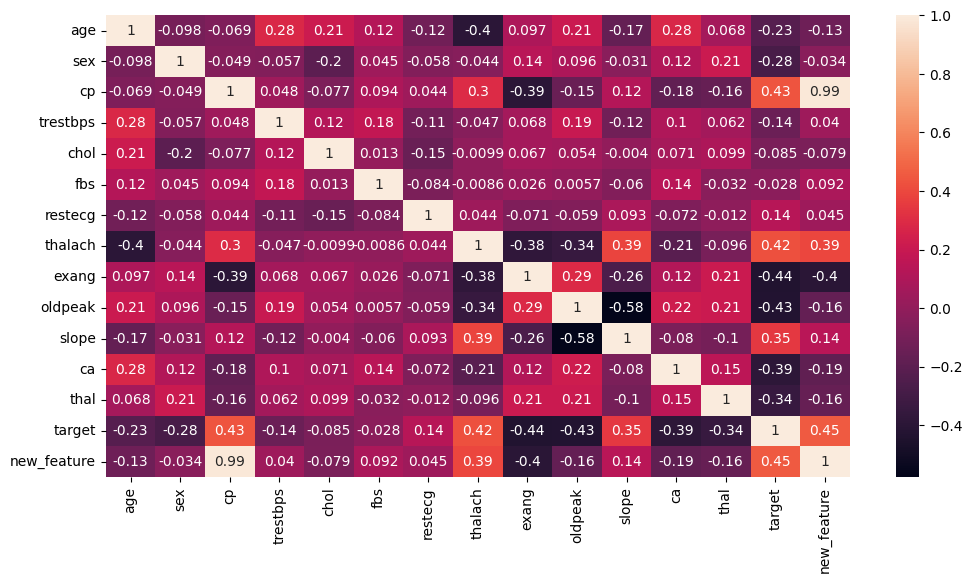

In [54]:
corr_matr = heart_disease_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matr, annot=True)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
heart_disease_df = pd.read_csv('../../datasets/heart-disease.csv')

In [10]:
heart_disease_df['new_feature'] = heart_disease_df['cp'] + heart_disease_df['thalach']

In [11]:
X = heart_disease_df.drop(['target'], axis=1)
y = heart_disease_df['target']

In [12]:
small_constant = 1
for col in heart_disease_df.select_dtypes(include=[np.number]).columns:
    heart_disease_df[col] = np.log(heart_disease_df[col] + small_constant)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
accuracy_with_scaling

0.9210526315789473